# 02. Data Understanding - PySpark

## 02.1. Importação das bibliotecas

### 02.1.1. Importando as bibliotecas nativas do Python

In [1]:
import sys

### 02.1.2. Importando as bibliotecas de terceiros

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession, types as T
from pyspark.sql.functions import *
# from ydata_profiling import ProfileReport

### 02.1.3. Importando os módulos locais do projeto

In [3]:
sys.path.append('..')
import functions.fn_charts_pandas as fn_charts_pandas
import functions.fn_stats_pyspark as fn_stats_pyspark
import params.consts as consts

## 02.2. Visão geral dos dados

### 02.2.0. Iniciando a sessão Spark

In [4]:
spark = SparkSession.builder.appName('spark').getOrCreate()

### 02.2.1. Habilitando a exibição de todas as colunas

In [5]:
pd.set_option('display.max_columns', None)

### 02.2.2. Armazenando o dataset em uma variável

In [6]:
df = spark.read \
    .format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .option('sep', ',') \
    .load(consts.DATASET_RAW_COMPRESSED_PYSPARK)

### 02.2.3. Visualizando a quantidade de linhas e colunas do dataset

In [7]:
(df.count(), len(df.columns))

(2240, 31)

### 02.2.4. Exibindo o dataset

In [8]:
df.show(5)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+-----------------+-------------------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|Dt_Customer_Month|Dt_Customer_Quarter|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+------

### 02.2.5. Visualizando os detalhes do dataset

In [9]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year_Birth: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Dt_Customer: date (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedCmp

### 02.2.6. Visualizando as estatísticas das colunas numéricas

In [10]:
fn_stats_pyspark.summary(df).show(truncate = False)

+-------+-------+----------+---------+--------------+--------+-------+--------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+-----------------+-------------------+
|summary|ID     |Year_Birth|Education|Marital_Status|Income  |Kidhome|Teenhome|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|Dt_Customer_Month|Dt_Customer_Quarter|
+-------+-------+----------+---------+--------------+--------+-------+--------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+------

### 02.2.7. Visualizando as estatísticas da colunas categóricas

In [11]:
categorical_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, T.StringType)]

df.describe(categorical_columns).show()

+-------+---------+--------------+
|summary|Education|Marital_Status|
+-------+---------+--------------+
|  count|     2240|          2240|
|   mean|     NULL|          NULL|
| stddev|     NULL|          NULL|
|    min| 2n Cycle|        Absurd|
|    max|      PhD|          YOLO|
+-------+---------+--------------+



### 02.2.8. Verificando as colunas com valores nulos

In [12]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+-----------------+-------------------+
| ID|Year_Birth|Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|Dt_Customer_Month|Dt_Customer_Quarter|
+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+------------

## 02.3. Entendimento dos dados

### 02.3.1. Gerando o relatório Profile Report e salvando em HTML

In [13]:
# report_eda = ProfileReport(df)

# report_eda.to_file(consts.EDA_0)

### 02.3.2. Confirmando os insights encontrados a partir do relatório 

- Agrupamento da coluna: Z_CostContact
+-------------+----------+-----+
|Z_CostContact|Percentage|Count|
+-------------+----------+-----+
|3            |100.0     |2240 |
+-------------+----------+-----+



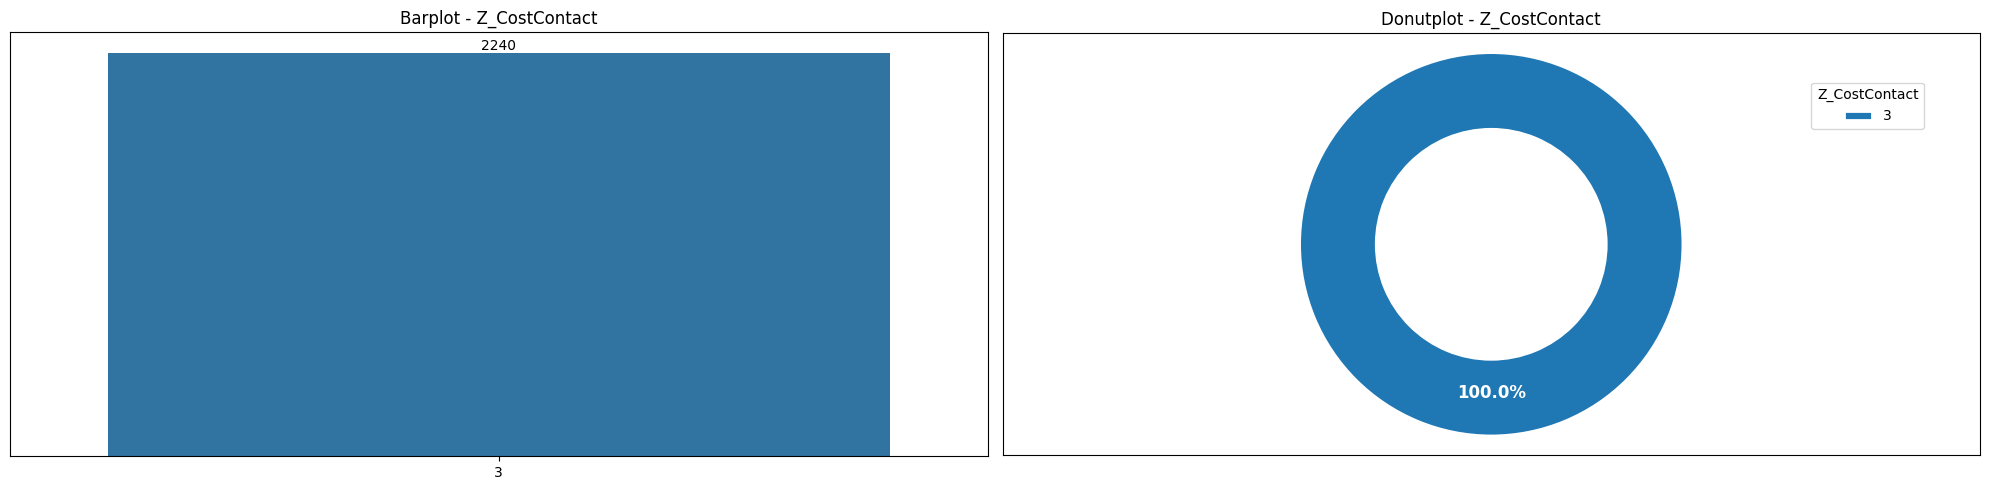

- Agrupamento da coluna: Z_Revenue
+---------+----------+-----+
|Z_Revenue|Percentage|Count|
+---------+----------+-----+
|11       |100.0     |2240 |
+---------+----------+-----+



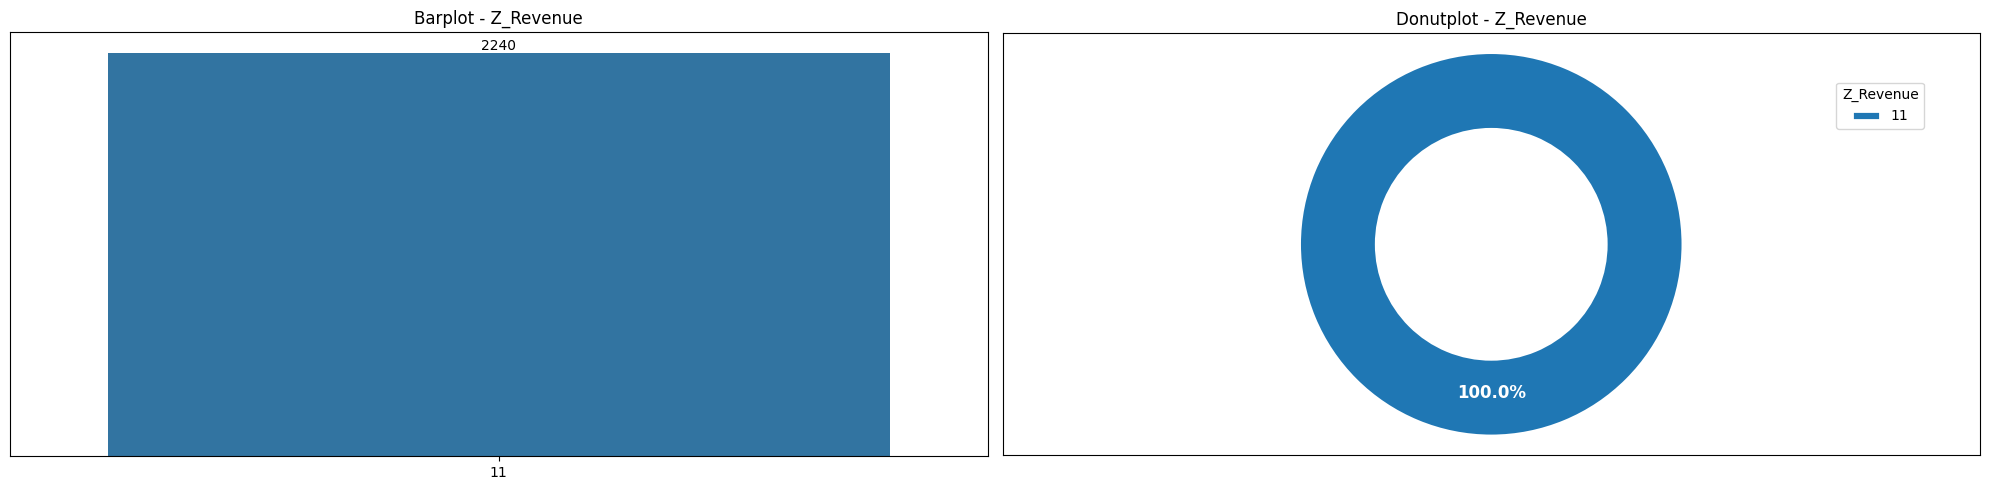

In [14]:
columns = ['Z_CostContact', 'Z_Revenue']

for i in columns:

    df_agg = fn_stats_pyspark.groupby_count(df, i)

    print(f'- Agrupamento da coluna: {i}')
    
    df_agg.show(truncate = False)

    fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), i, 'Count')

    plt.savefig(f'../images/outputs/charts/pyspark/nb02_barplot_donutplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

### 02.3.3. Listando os problemas encontrados nos dados a partir da análise do relatório e suas soluções

- **Colunas que devem ter o tipo de dados corrigido** 
    - **Comentários gerais:** Colunas com o tipo de dados errado geralmente não permite seguir com análises e modelos de machine learning, pois o fato do tipo de dados estar errado inviabiliza operações de cálculos, textos e datas de acordo com o tipo ideal. Em casos assim, o ideal é corrigir o tipo de dados das colunas.
    1. **Income**
        - **Problema:** A coluna Income apresenta o tipo de dados como integer.
        - **Solução:** Converter o tipo de dados da coluna Income para double.

    <br>
- **Colunas que devem ter valores nulos/vazios tratados** 
    - **Comentários gerais:** Como o dataset possui 2.240 registros, os 24 dados nulos da coluna Income representam apenas 1% dos dados. Dessa forma, ao remover esses registros boa parte do dataset original se mantém já que somente essa coluna apresenta valores nulos ou vazios.
    1. **Income** 
        - **Problema:** A coluna Income apresenta 24 registros nulos.
        - **Solução:** Remover os 24 registros nulos da coluna Income.

    <br>
- **Colunas de tempo/idade que devem ser criadas a partir de colunas de data**
    - **Comentários gerais:** Colunas de data geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois datas, anos, meses e dias aletarórios não significam muita coisa. Em casos assim, o ideal é criar a partir dessas colunas, novas colunas com informações de tempo decorrido e idade para revelar novos padrões no conjunto de dados. Além disso, para que essas colunas de dias, meses, anos e idade não fiquem variando a cada vez que o notebook for executado, foi usado o valor máximo das datas da campanha como referência do dia atual para evitar isso.
    1. **Days_Since_Enrolled**
        - **Problema:** A coluna Dt_Customer apresenta apenas informações de data.
        - **Solução:** Criar uma nova coluna chamada Days_Since_Enrolled que representa o tempo que o consumidor é cliente da empresa em dias.
    2. **Years_Since_Enrolled**
        - **Problema:** A coluna Dt_Customer apresenta apenas informações de data.
        - **Solução:** Criar uma nova coluna chamada Years_Since_Enrolled que representa o tempo que o consumidor é cliente da empresa em anos.
    3. **Age**
        - **Problema:** A coluna Year_Birth apresenta apenas informações de ano.
        - **Solução:** Criar uma nova coluna chamada Age que representa a idade do cliente.

    <br>
- **Colunas que devem ter categorias mescladas** 
    - **Comentários gerais:** Colunas com muitas categorias geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois os dados ficam muito dispersos e não refletem possíveis padrões estatísticos do conjunto de dados. Em casos assim, o ideal é agrupar a categoria dos dados para que fiquem mais concisos e possam revelar padrões.
    1. **AgeGroup**
        - **Problema:** A coluna Age apresenta a informação de idade de forma bem diluída.
        - **Solução:** Criar uma nova coluna chamada AgeGroup que representa a idade do cliente segmentadas por faixas etárias em intervalos de cerca de 15 anos.
    2. **Marital_Status**
        - **Problema:** A coluna Marital_Status apresenta muitas categorias de dados.
        - **Solução:** Transformar as várias categorias da coluna Marital_Status em apenas Single ou Partner.

    <br>
- **Colunas que devem ser unificadas**
    - **Comentários gerais:** Colunas com informações repetitivas geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois costuma dizer a mesma coisa de formas diferentes. Em casos assim, o ideal é unificar essas colunas para que a informação fique concentrada em apenas uma coluna.
    1. **Children**
        - **Problema:** As colunas Kidhome e Teenhome apresentam o mesmo tipo de informação.
        - **Solução:** Criar uma nova coluna chamada Children que representa o total de filhos do cliente.
    2. **MntTotal**
        - **Problema:** As colunas MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweerProducts e MntGoldProds apresentam o mesmo tipo de informação.
        - **Solução:** Criar uma nova coluna chamada MntTotal que representa o total de produtos adquiridos pelo cliente.
    3. **AcceptedCmpTotal**
        - **Problema:** As colunas AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 e AcceptedCmp5 apresentam o mesmo tipo de informação.
        - **Solução:** Criar uma nova coluna chamada AcceptedCmpTotal que representa o total de campanhas aceitas pelo cliente.
    4. **NumTotalPurchases**
        - **Problema:** As colunas NumWebPurchases, NumCatalogPurchases e NumStorePurchases apresentam o mesmo tipo de informação.
        - **Solução:** Criar uma nova coluna chamada NumTotalPurchases que representa o total de compras feitas pelo cliente.

    <br>
- **Colunas que devem ser criadas derivadas de outras**
    - **Comentários gerais:** Modelos de machine learning geralmente encontram padrões mais facilmente em colunas binárias, ou seja, 0 ou 1. Em casos assim, o ideal é criar colunas que refletem esse padrão binário dos dados para que possa facilitar o processo de aprendizado do modelo.
    1. **HasChildren**
        - **Problema:** A coluna Children apresenta a quantidade de filhos.
        - **Solução:** Criar uma nova coluna chamada HasChildren que representa se o cliente tem filhos ou não.
    2. **MntRegularProd**
        - **Problema:** No conjunto de dados há a informação de total de produtos comprados na coluna MntTotal e total de produtos gold comprados na coluna MntGoldProds, mas não há a informação de total de produtos "não gold" comprados.
        - **Solução:** Criar uma nova coluna chamada MntRegularProd que representa o total de produtos "não gold" ou regulares comprados pelo cliente.
    3. **HasAcceptedCmp**
        - **Problema:** A coluna AcceptedCmpTotal apresenta a quantidade de campanhas aceitas pelo cliente.
        - **Solução:** Criar uma coluna chamada HasAcceptedCmp que representa se o cliente já aceitou alguma campanha ou não.

    <br>
- **Colunas que devem ter valores outliers tratados** 
    - **Comentários gerais:** Colunas com valores outliers geralmente podem ocasionar erros importantes em análises e modelos de machine learning, pois estão destoando dos padrões estatísticos do conjunto de dados. Em casos assim, o ideal é remover esses outliers caso sejam poucos e estejam destoando muito dos demais.
    1. **Age**
        - **Problema:** A coluna Age apresenta poucos outliers que distoam muito dos demais.
        - **Solução:** Remover os outliers da coluna Age.
    2. **Income**
        - **Problema:** A coluna Income apresenta poucos outliers que distoam muito dos demais.
        - **Solução:** Remover os outliers da coluna Income.
    3. **MntTotal**
        - **Problema:** A coluna MntTotal apresenta poucos outliers que distoam pouco dos demais.
        - **Solução:** Manter os outliers da coluna MntTotal.

    <br>
- **Colunas que devem ser excluídas por valores únicos** 
    - **Comentários gerais:** Colunas com valores únicos geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois são comumente identificadores como Id, nome ou CPF. Em casos assim, o ideal é excluir essas colunas do conjunto de dados. E lembrando que ao remover colunas com identificadores únicos é possível que o conjunto de dados passe a ter registros duplicados, já que é possível que hajam duas pessoas com tudo igual menos o identificador. Nesse caso, a verificação de registros duplicados deve ser feita anteriormente.
    1. **ID**
        - **Problema:** A coluna ID apresenta valores com altíssima cardinalidade.
        - **Solução:** Excluir a coluna ID do conjunto de dados.

    <br>
- **Colunas que devem ser excluídas por valores constantes** 
    - **Comentários gerais:** Colunas com valores iguais ou constantes geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois todos os registros possuem o mesmo valor. Em casos assim, o ideal é excluir essas colunas do conjunto de dados.
    1. **Z_CostContact**
        - **Problema:** A coluna Z_CostContact apresenta valores constantes.
        - **Solução:** Excluir a coluna Z_CostContact do conjunto de dados.
    2. **Z_Revenue**
        - **Problema:** A coluna Z_Revenue apresenta valores constantes.
        - **Solução:** Excluir a coluna Z_Revenue do conjunto de dados.

    <br>
- **Colunas que devem ser excluídas após serem utilizadas como apoio** 
    - **Comentários gerais:** Colunas usadas como apoio durante a criação de novas colunas geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois já foi extraído o que se precisava delas e além disso, excesso de informações, principalmente repetitivas atrapalham a performance de molodes de machine learning. Em casos assim, o ideal é excluir essas colunas do conjunto de dados.
    1. **Dt_Customer**
        - **Problema:** A coluna Dt_Customer foi usada apenas como apoio.
        - **Solução:** Excluir a coluna Dt_Customer do conjunto de dados.
    2. **Year_Birth**
        - **Problema:** A coluna Year_Birth foi usada apenas como apoio.
        - **Solução:** Excluir a coluna Year_Birth do conjunto de dados.
    3. **Kidhome**
        - **Problema:** A coluna *Kidhome foi usada apenas como apoio.
        - **Solução:** Excluir a coluna *Kidhome do conjunto de dados.
    4. **Teenhome**
        - **Problema:** A coluna Teenhome foi usada apenas como apoio.
        - **Solução:** Excluir a coluna Teenhome do conjunto de dados.
    5. **MntWines**
        - **Problema:** A coluna MntWines foi usada apenas como apoio.
        - **Solução:** Excluir a coluna MntWines do conjunto de dados.
    6. **MntFruits**
        - **Problema:** A coluna MntFruits foi usada apenas como apoio.
        - **Solução:** Excluir a coluna MntFruits do conjunto de dados.
    7. **MntMeatProducts**
        - **Problema:** A coluna MntMeatProducts foi usada apenas como apoio.
        - **Solução:** Excluir a coluna MntMeatProducts do conjunto de dados.
    8. **MntFishProducts**
        - **Problema:** A coluna MntFishProducts foi usada apenas como apoio.
        - **Solução:** Excluir a coluna MntFishProducts do conjunto de dados.
    9. **MntSweetProducts**
        - **Problema:** A coluna MntSweetProducts foi usada apenas como apoio.
        - **Solução:** Excluir a coluna MntSweetProducts do conjunto de dados.
    10. **AcceptedCmp1**
        - **Problema:** A coluna AcceptedCmp1 foi usada apenas como apoio.
        - **Solução:** Excluir a coluna AcceptedCmp1 do conjunto de dados.
    11. **AcceptedCmp2**
        - **Problema:** A coluna AcceptedCmp2 foi usada apenas como apoio.
        - **Solução:** Excluir a coluna AcceptedCmp2 do conjunto de dados.
    12. **AcceptedCmp3**
        - **Problema:** A coluna AcceptedCmp3 foi usada apenas como apoio.
        - **Solução:** Excluir a coluna AcceptedCmp3 do conjunto de dados.
    13. **AcceptedCmp4**
        - **Problema:** A coluna AcceptedCmp4 foi usada apenas como apoio.
        - **Solução:** Excluir a coluna AcceptedCmp4 do conjunto de dados.
    14. **AcceptedCmp5**
        - **Problema:** A coluna AcceptedCmp5 foi usada apenas como apoio.
        - **Solução:** Excluir a coluna AcceptedCmp5 do conjunto de dados.
    15. **NumWebPurchases**
        - **Problema:** A coluna NumWebPurchases foi usada apenas como apoio.
        - **Solução:** Excluir a coluna NumWebPurchases do conjunto de dados.
    16. **NumCatalogPurchases**
        - **Problema:** A coluna NumCatalogPurchases foi usada apenas como apoio.
        - **Solução:** Excluir a coluna NumCatalogPurchases do conjunto de dados.
    17. **NumStorePurchases**
        - **Problema:** A coluna NumStorePurchases foi usada apenas como apoio.
        - **Solução:** Excluir a coluna NumStorePurchases do conjunto de dados.